In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
dc_tile='45_-35'

In [3]:
input_file='/LUSTRE/MADMEX/tasks/2020/1_clusterization_for_agriculture_labeling/features_computed/all_dc_tilesndvi-gndvi-avi/03-04-2020/45_-35/03-04-2020_clusters_45_-35_nclusters_11_sample_1007_with_class_aoi.shp'

In [4]:
gdf = gpd.read_file(input_file)

In [5]:
gdf.head()

,features_i,preds,class,geometry
0,140061,0,None,"POLYGON ((3270840.000 687150.000, 3270850.000 ..."
1,394085,0,None,"POLYGON ((3232030.000 708310.000, 3232050.000 ..."
2,296738,0,None,"POLYGON ((3245790.000 700160.000, 3245810.000 ..."
3,346693,0,None,"POLYGON ((3230210.000 704400.000, 3230220.000 ..."
4,431384,0,None,"POLYGON ((3229590.000 711480.000, 3229600.000 ..."


**Preds**

In [6]:
s_preds = gdf['preds']

In [7]:
s_preds

0        0
1        0
2        0
3        0
4        0
        ..
1002     7
1003     6
1004    10
1005    10
1006     4
Name: preds, Length: 1007, dtype: int64

In [8]:
s_preds.value_counts()

0     160
10    137
9     134
7     132
5     111
1      92
8      73
6      51
3      44
2      42
4      31
Name: preds, dtype: int64

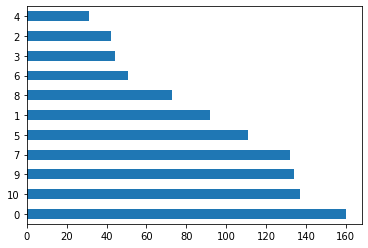

In [9]:
s_preds.value_counts().plot.barh()

**Class**

In [10]:
idx_class_not_null = gdf['class'].notnull()

In [11]:
s_class = gdf.loc[idx_class_not_null,'class']

In [12]:
s_class

319     57
320     57
321     57
322     62
323     57
        ..
1002    64
1003    64
1004    54
1005    57
1006    54
Name: class, Length: 688, dtype: object

In [13]:
s_class.value_counts()

54    241
64    144
57    136
62     67
59     49
58     26
50     14
52      5
55      4
63      1
51      1
Name: class, dtype: int64

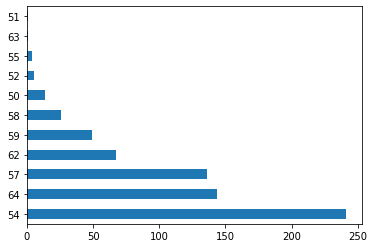

In [ ]:
s_class.value_counts().plot.barh()

In [ ]:
fg=plt.figure(1)
fg.set_figheight(5)
fg.set_figwidth(15)
plt.subplot(1,2,1)
s_class.value_counts().plot.barh()
plt.title(dc_tile)
plt.subplot(1,2,2)
s_preds.value_counts().plot.barh()
plt.title(dc_tile)
plt.show()